<a href="https://colab.research.google.com/github/lhmtri18/analysis_ml_dl_python/blob/master/Retail_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Phân tích bộ dữ liệu **Retail Data Analytics** từ kaggle.com.
Link dataset: https://www.kaggle.com/manjeetsingh/retaildataset

Tác giả: Lê Huỳnh Minh Trí

University of Science, Ho Chi Minh

Mô tả dữ liệu( trích dẫn nguyên gốc)

**Content**

- You are provided with historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

- Within the Excel Sheet, there are 3 Tabs – Stores, Features and Sales

 **Stores** 

Anonymized information about the 45 stores, indicating the type and size of store

**Features**

Contains additional data related to the store, department, and regional activity for the given dates.

- Store - the store number
- Date - the week
- Temperature - average temperature in the region
- Fuel_Price - cost of fuel in the region
- MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
- CPI - the consumer price index

The Consumer Price Index (CPI) is a measure that examines the weighted average of prices of a basket of consumer goods and services, such as transportation, food, and medical care. It is calculated by taking price changes for each item in the predetermined basket of goods and averaging them. Changes in the CPI are used to assess price changes associated with the cost of living. The CPI is one of the most frequently used statistics for identifying periods of inflation or deflation.(https://www.investopedia.com/terms/c/consumerpriceindex.asp)



- Unemployment - the unemployment rate
- IsHoliday - whether the week is a special holiday week

**Sales**

Historical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:

- Store - the store number
- Dept - the department number
- Date - the week
- Weekly_Sales -  sales for the given department in the given store
- IsHoliday - whether the week is a special holiday week

Load dataset from kaggle sử dụng kaggle API

In [1]:
! pip install -q kaggle
from google.colab import files

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"trlhunhminh","key":"9193d2a2d5ae057c725abeaedf88abc8"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d manjeetsingh/retaildataset

  0% 0.00/3.11M [00:00<?, ?B/s]
100% 3.11M/3.11M [00:00<00:00, 104MB/s]


In [5]:
from zipfile import ZipFile

file_name='retaildataset.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [30]:
import pandas as pd
features= pd.read_csv('/content/Features data set.csv')
sales= pd.read_csv('/content/sales data-set.csv')
stores = pd.read_csv('/content/stores data-set.csv')
features.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,12/03/2010,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,19/03/2010,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,26/03/2010,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,02/04/2010,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,09/04/2010,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [31]:
sales.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
5,1,1,12/03/2010,21043.39,False
6,1,1,19/03/2010,22136.64,False
7,1,1,26/03/2010,26229.21,False
8,1,1,02/04/2010,57258.43,False
9,1,1,09/04/2010,42960.91,False


In [32]:
stores.head(10)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [33]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [34]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [35]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


Chuyển ngày dạng chuỗi về dạng datetime trong python

In [36]:
features['Date'] = pd.to_datetime(features['Date'])
sales['Date'] = pd.to_datetime(sales['Date'])

In [37]:
print(features.shape)
print(sales.shape)
print(stores.shape)

print(sales[0:1].Date, sales[-1:].Date)

print(features[0:1].Date, features[-1:].Date)

(8190, 12)
(421570, 5)
(45, 3)
0   2010-05-02
Name: Date, dtype: datetime64[ns] 421569   2012-10-26
Name: Date, dtype: datetime64[ns]
0   2010-05-02
Name: Date, dtype: datetime64[ns] 8189   2013-07-26
Name: Date, dtype: datetime64[ns]


In [38]:
print(features['Temperature'].max(),features['Temperature'].min())

101.95 -7.29


Group by Date cho bảng sales và features của tất cả các stores và depts

In [39]:
features_by_date = features.groupby("Date").agg({"Temperature":"mean"
                                            ,"Fuel_Price":"mean"
                                            ,"IsHoliday":"sum"
                                            ,"CPI":"mean"
                                           ,"Unemployment":"mean"})
features_by_date= features_by_date.sort_index()
features_by_date.tail(5)

,Temperature,Fuel_Price,IsHoliday,CPI,Unemployment
Date,,,,,
2013-08-03,44.889111,3.775711,0.0,177.672434,6.876444
2013-10-05,62.092444,3.542822,0.0,NaN,NaN
2013-11-01,38.091556,3.377489,0.0,177.235667,6.876444
2013-12-04,55.050222,3.671044,0.0,177.990680,6.719244
2013-12-07,80.798667,3.568111,0.0,NaN,NaN


In [40]:
sales_by_date= sales.groupby("Date").agg({"Weekly_Sales":"sum"})
sales_by_date.sort_index(inplace=True)
sales_by_date.head(5)

,Weekly_Sales
Date,
2010-01-10,42239875.87
2010-02-04,50423831.26
2010-02-07,48917484.50
2010-02-19,48276993.78
2010-02-26,43968571.13


Text(0.5, 1.0, 'Distribution of sales by date')

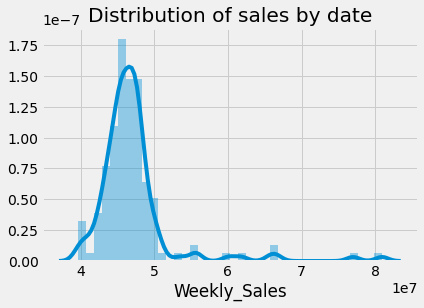

In [41]:
import seaborn as sns
sns.distplot((sales.groupby("Date").agg({"Weekly_Sales":"sum"}).Weekly_Sales).apply(int)).set_title('Distribution of sales by date')

Với doanh thu của một shop thì phân phối này theo tôi khá là bình thường vì các ngày đặc biệt như ngày lễ thì doanh thu có thể gấp đôi so với ngày thường. Chưa kể đến sự khác biệt các loại cửa hàng và kích thước, vị trí của các cửa hàng khác nhau sẽ cho doanh thu khác nhau nên sự chênh lệch là có thể chấp nhận được.

Có sự các nhân tố bên ngoài và sales theo thời gian. Chúng ta có thể kiểm tra sự ảnh hưởng của các yếu tố bên ngoài lên số lượng sales của các shop

In [42]:
temp_features_by_date= features_by_date[:'2012-12-10']
sales_by_date.Weekly_Sales = sales_by_date.Weekly_Sales/1000000
sales_by_date.Weekly_Sales = sales_by_date.Weekly_Sales.apply(int)
data = pd.merge(sales_by_date, temp_features_by_date, left_index=True,right_index=True, how='left')
data.head(5)

,Weekly_Sales,Temperature,Fuel_Price,IsHoliday,CPI,Unemployment
Date,,,,,,
2010-01-10,42,69.868000,2.734333,0.0,168.354706,8.475289
2010-02-04,50,53.120889,2.827333,0.0,167.789036,8.497711
2010-02-07,48,77.133333,2.793511,0.0,167.982101,8.428578
2010-02-19,48,37.719778,2.672067,0.0,167.871686,8.619311
2010-02-26,43,39.243556,2.683933,0.0,167.909657,8.619311


In [43]:
data["IsHoliday"] = data["IsHoliday"].apply(lambda x: True if x == 45.0 else False )

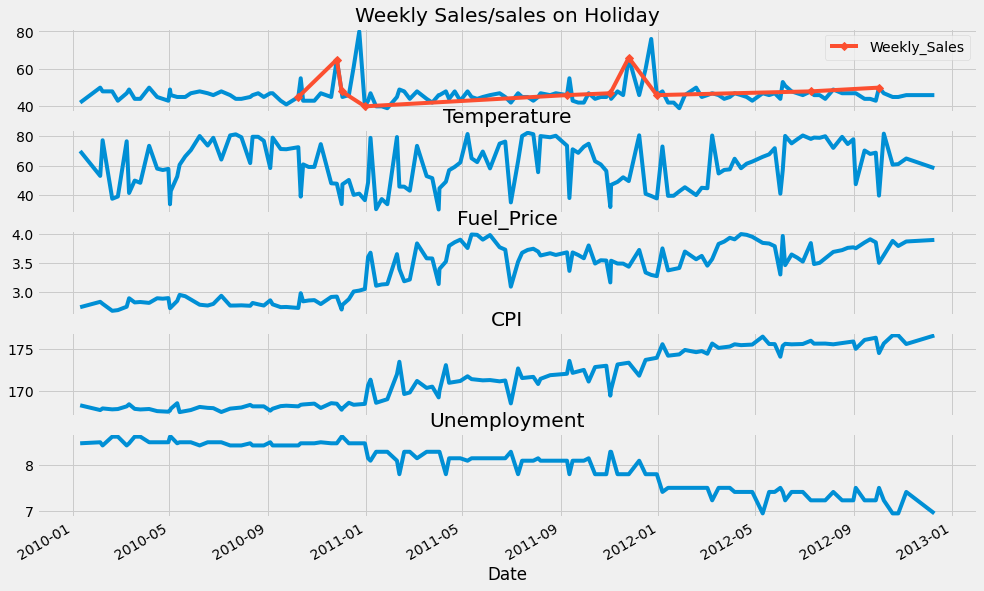

In [44]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#plt.figure(figsize=(15,4))
fig, ax = plt.subplots(5,1,figsize=(15,10),sharex=True) 
data["Weekly_Sales"].plot(ax=ax[0],title="Weekly Sales/sales on Holiday")
data[data.IsHoliday==True]["Weekly_Sales"].plot(marker="D",ax=ax[0],legend="Holiday Week sale")
data["Temperature"].plot(ax=ax[1], title="Temperature")
data["Fuel_Price"].plot(ax=ax[2],title="Fuel_Price")
data["CPI"].plot(ax=ax[3],title="CPI")
data["Unemployment"].plot(ax=ax[4],title="Unemployment")

Qua biểu đồ phía trên ta có thể thấy được rằng sales (đường màu cam)tăng mạnh vào những tháng cuối năm. Tỉ lệ thất nghiệp(Unemployment) giảm qua các năm. CPI và Fuel Price tăng dần. Nhiệt độ thì theo dạng random walk, không có trend hay seasonality cụ thể.

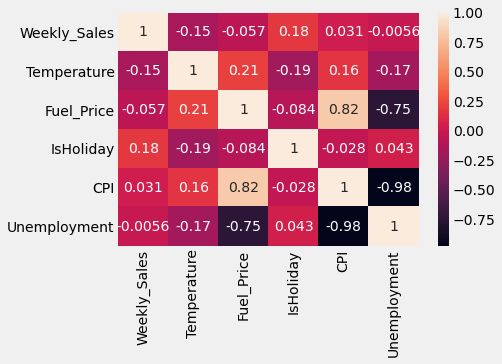

In [45]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True)

Có thể thấy có sự tương quan cao giữa CPI( chỉ số giá tiêu dùng) với Fuel_Price và Unemployment. Lý do có thể bởi vì chỉ số giá tiêu dùng là một chỉ tiêu tương đối phản ánh xu thế và mức độ biến động của giá bán lẻ hàng hóa tiêu dùng và dịch vụ dùng trong sinh hoạt của dân cư và các hộ gia đình. Bởi vậy nó được dùng để theo dõi sự thay đổi của chi phí sinh hoạt theo thời gian. Khi CPI tăng đồng nghĩa với việc mức giá trung bình tăng và ngược lại(https://vietnambiz.vn/chi-so-gia-tieu-dung-cpi-la-gi-y-nghia-va-cach-xay-dung-20190806091144265.htm). Do đó khi CPI tương quan thuận với Fuel Price vì khi giá xăng dầu tăng thì CPI cũng tăng và tương quan nghịch với tỉ lệ thất nghiệp vì chi phí sinh hoạt tăng thì có thể nhiều người sẽ kiếm công việc làm để trang trải chi phí cuộc sống nên có thể tỉ lệ thất nghiệp sẽ giảm. Tuy nhiên, chỉ số này thuộc về kinh tế khá nhiều nên tôi sẽ không đi sâu vào các chỉ số này ở bài phân tích này.
Ngoài các sự tương quan mạnh trên thì có thể thấy là Sales không phụ thuộc vào các yếu tố nêu trên.

Text(0.5, 1.0, 'Sales by Months')

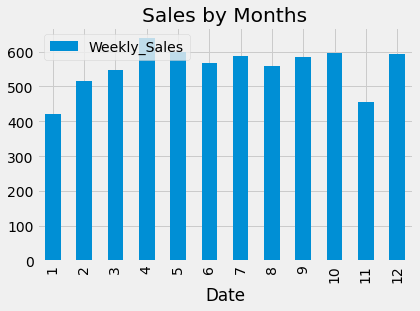

In [46]:
sales_by_month= data.groupby(data.index.month).agg({"Weekly_Sales":"sum"})
sales_by_month.plot(kind='bar')
plt.title('Sales by Months')

Có thể thấy rằng sales tăng mạnh vào tháng 4, 5, 10 và 12. Lý do vì vào những dịp cuối năm ở Mỹ, mọi người thường có những ngày hội mua sắm lớn như Chirstmas, Black Friday Sales hay là New Year. Còn vào tháng 4 có lượng sales lớn nhưng hiện tại tôi chưa đoán ra được lý do cụ thể. Có thể vào những năm data được ghi lại, tháng 6,7 có khủng hoảng hay thiên tai xảy ra nên vào tháng 4 5 mọi người mua đồ tích trữ làm sales tăng mạnh. Tôi nghĩ vậy :)

Text(0.5, 1.0, 'Sales by Year')

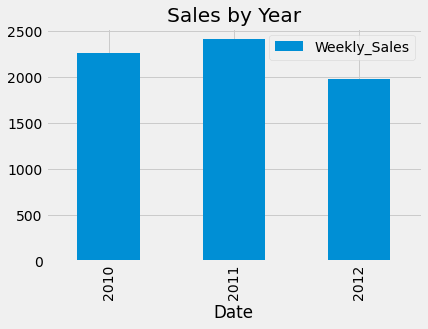

In [47]:
sales_by_year = data.groupby(data.index.year).agg({"Weekly_Sales":"sum"})
sales_by_year.plot(kind="bar")
plt.title("Sales by Year")

Thông qua biểu đồ bên trên, chúng ta rõ ràng có thể thấy được trong 3 năm từ 2010 đến 2012 thì sales 2011 là lớn nhất.

In [48]:
data.head()

,Weekly_Sales,Temperature,Fuel_Price,IsHoliday,CPI,Unemployment
Date,,,,,,
2010-01-10,42,69.868000,2.734333,False,168.354706,8.475289
2010-02-04,50,53.120889,2.827333,False,167.789036,8.497711
2010-02-07,48,77.133333,2.793511,False,167.982101,8.428578
2010-02-19,48,37.719778,2.672067,False,167.871686,8.619311
2010-02-26,43,39.243556,2.683933,False,167.909657,8.619311


In [49]:
y = sales.groupby("Date").agg({"Weekly_Sales":"sum"}).Weekly_Sales.apply(int).sort_index()
y= y/100000

Phân tích chuỗi thời gian( **Time series analysis**) dựa trên sales


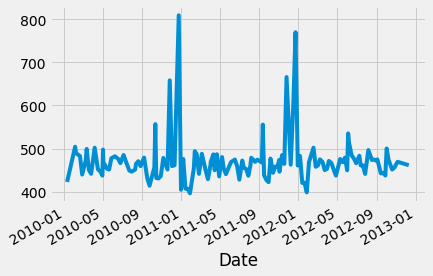

In [50]:
y.plot()

Có thể thấy rõ có tính Seasonality 

Tiếp theo , chúng ta xét tính Stationary.
(we can assume the series to be stationary if it has constant statistical properties over time and these properties can be:

• constant mean

• constant variance

• an auto co-variance that does not depend on time.)
trích dẫn từ 

https://medium.com/@stallonejacob/time-series-forecast-a-basic-introduction-using-python-414fcb963000
**(1)**

Dickey-fuller Test :This is one of the statistical tests for checking stationarity. First we consider the null hypothesis: the time series is non- stationary. The result from the rest will contain the test statistic and critical value for different confidence levels. The idea is to have Test statistics less than critical value, in this case we can reject the null hypothesis and say that this Time series is indeed stationary (the force is strong with this one !!) 

**trích từ (1)**

Thông tin chi tiết về Dickey-fuller Test:

http://www.real-statistics.com/time-series-analysis/stochastic-processes/dickey-fuller-test/

In [54]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
def test_stationarity(timeseries):
    pd.Series.rolling
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

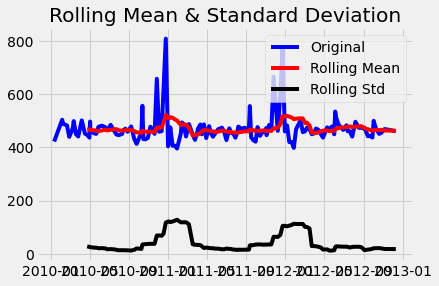

Results of Dickey-Fuller Test:
Test Statistic                -9.837722e+00
p-value                        4.845103e-17
#Lags Used                     0.000000e+00
Number of Observations Used    1.420000e+02
Critical Value (1%)           -3.477262e+00
Critical Value (5%)           -2.882118e+00
Critical Value (10%)          -2.577743e+00
dtype: float64


In [55]:
test_stationarity(y)

Vậy sales by dates là stationary bởi vì

- Mean và std tương quan với nhau và có thể xem như không đổi theo thời gian

- Dickey_Fuller Test : Test statistic < Critical value -> Reject Ho(ts is non-stationary) -> **Time series is stationary**


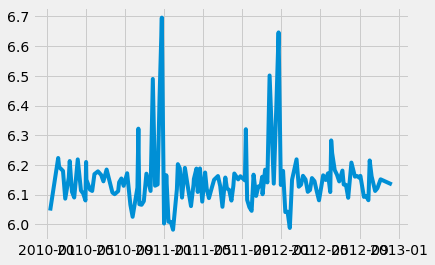

In [56]:
plt.plot(np.log(y))

Hàm log làm cho đồ thị mịn hơn, làm cho giá trị ở y-axis nhỏ hơn. Tuy nhiên, chưa làm giảm tính Seasonality

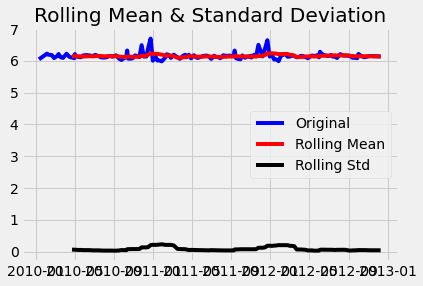

Results of Dickey-Fuller Test:
Test Statistic                -9.826764e+00
p-value                        5.163009e-17
#Lags Used                     0.000000e+00
Number of Observations Used    1.420000e+02
Critical Value (1%)           -3.477262e+00
Critical Value (5%)           -2.882118e+00
Critical Value (10%)          -2.577743e+00
dtype: float64


In [57]:
test_stationarity(np.log(y))

Sử dụng hàm log làm giảm đáng kể tính Trend, cũng như làm cho mean và std trở nên constant hơn qua thời gian. Qua đó , tăng tính stationary

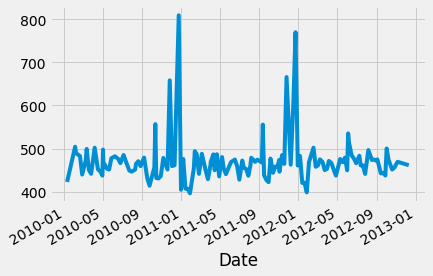

In [58]:
y.plot()

Dự đoán khá khớp với thực tế, nhưng có vẻ seasonality bị đến sớm ở kết quả dự đoán. Tuy nhiên, kết quả là chấp nhận được cho một mô hình tuyến tính.

In [59]:
data_Store = features.groupby("Store").agg({"Temperature":"mean","Fuel_Price":"mean","IsHoliday":"sum"})

temp_store = sales.groupby("Store").agg({"Weekly_Sales":"sum"})
temp_store.Weekly_Sales = temp_store.Weekly_Sales/1000000
temp_store.Weekly_Sales = temp_store.Weekly_Sales.apply(int)

data_Store.head()

,Temperature,Fuel_Price,IsHoliday
Store,,,
1,66.912033,3.259242,13.0
2,66.728407,3.259242,13.0
3,70.394176,3.259242,13.0
4,61.416648,3.254885,13.0
5,68.224505,3.259242,13.0


In [60]:
import numpy as np
data_Store.set_index(np.arange(0,45),inplace=True)
original_stores= stores.copy()
stores["temp"] = data_Store.Temperature
stores["Fuel_Price"] = data_Store.Fuel_Price
stores["holiday"] = data_Store.IsHoliday
stores["Weekly_Sales"] = temp_store.Weekly_Sales
stores.head()

,Store,Type,Size,temp,Fuel_Price,holiday,Weekly_Sales
0,1,A,151315,66.912033,3.259242,13.0,NaN
1,2,A,202307,66.728407,3.259242,13.0,222.0
2,3,B,37392,70.394176,3.259242,13.0,275.0
3,4,A,205863,61.416648,3.254885,13.0,57.0
4,5,B,34875,68.224505,3.259242,13.0,299.0


In [62]:
stores.describe()

,Store,Size,temp,Fuel_Price,holiday,Weekly_Sales
count,45.000000,45.000000,45.000000,45.000000,45.0,44.000000
mean,23.000000,130287.600000,59.356198,3.405992,13.0,150.090909
std,13.133926,63825.271991,9.956122,0.153935,0.0,78.780478
min,1.000000,34875.000000,37.921264,3.245945,13.0,37.000000
25%,12.000000,70713.000000,51.866319,3.259242,13.0,78.500000
50%,23.000000,126512.000000,58.107912,3.328764,13.0,140.500000
75%,34.000000,202307.000000,68.504670,3.497874,13.0,200.750000
max,45.000000,219622.000000,75.438077,3.643654,13.0,301.000000


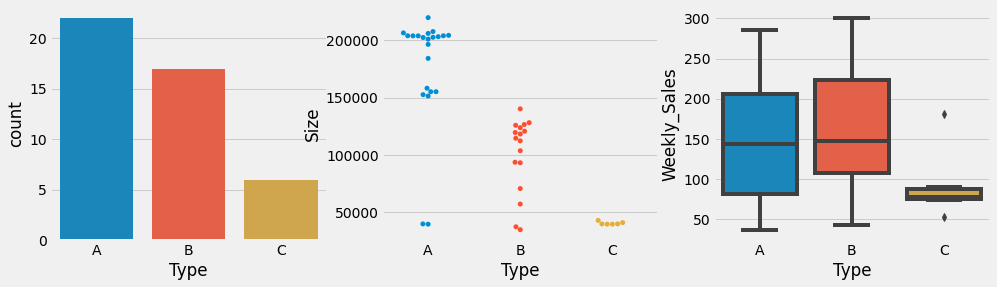

In [61]:
fig,ax = plt.subplots(1,3,figsize=(15, 4))
sns.countplot(stores.Type,ax=ax[0])
sns.swarmplot(data = stores,y="Size",x="Type",ax=ax[1])
sns.boxplot(data = stores,y="Weekly_Sales",x="Type",ax=ax[2])

Qua biểu đồ, chúng ta có thể thấy rằng số lượng cửa hàng loại A chiếm nhiều nhất, kế đến là loại B và cuối cùng là loại C. Tuy nhiên, cửa hàng loại A chiếm nhiều nhất và kích thước cửa hàng thường lớn chiếm rất nhiều nhưng trung bình doanh số sales lại nhỏ hơn cửa hàng loại B và max sales cũng nhỏ hơn cửa hàng loại B. Bên cạnh đó chúng ta có thể thấy điều hiển nhiên là do cửa hàng loại C ít và size cũng nhỏ( biểu đồ 2) nên doanh số sales cửa hàng loại C nhỏ là điều hiển nhiên có thể nhìn thấy. 

Phân tích dựa trên tiêu chí Department

In [63]:
data_Dept = sales.groupby("Dept").agg({"Weekly_Sales":"sum"})
data_Dept.Weekly_Sales = data_Dept.Weekly_Sales/10000
data_Dept.Weekly_Sales = data_Dept.Weekly_Sales.apply(int)
data_Dept.sort_values(by="Weekly_Sales")

,Weekly_Sales
Dept,
39,0
78,0
43,0
47,0
51,3
...,...
90,29106
72,30572
38,39311


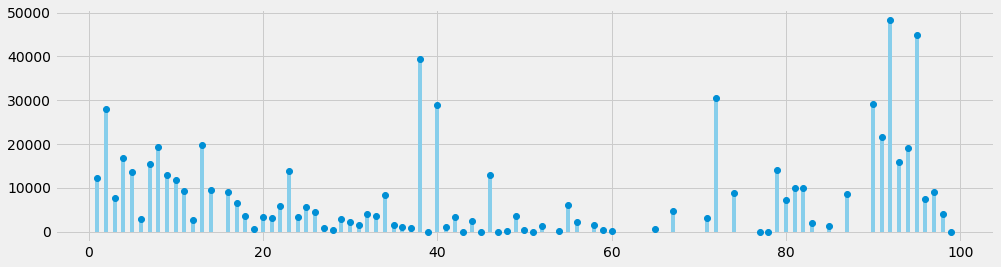

In [64]:
fig1, ax1 = plt.subplots(figsize=(15, 4))
#ordered_df = data_Dept.sort_values(by='Weekly_Sales')
plt.vlines(x=data_Dept.index, ymin=0, ymax=data_Dept['Weekly_Sales'], color='skyblue')
plt.plot(data_Dept.index,data_Dept['Weekly_Sales'], "o")

Qua biểu đồ có thể nhìn thấy được Departments nào có doanh số cao nên tôi sẽ không nói thêm ở đây.

In [65]:
sales_date_store = sales.groupby(["Date","Store"]).agg({"Weekly_Sales":"sum"})
sales_date_store.sort_index(inplace=True)
sales_date_store.Weekly_Sales = sales_date_store.Weekly_Sales/10000
sales_date_store.Weekly_Sales = sales_date_store.Weekly_Sales.apply(int)
sales_date_store.head()

Weekly_Sales
Date       Store              
2010-01-10 1               145
           2               182
           3                35
           4               184
           5                28

In [66]:
data_table = pd.merge(features,sales_date_store ,  how='left', on=["Date","Store"])
data_table.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Weekly_Sales
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,164.0
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,164.0
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,161.0
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,140.0
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,155.0


In [67]:
data_table = pd.merge(data_table,stores[["Store","Type"]] ,  how='left', on=["Store"])
data_table.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1,inplace=True)
data_table.head(20)

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly_Sales,Type
0,1,2010-05-02,42.31,2.572,211.096358,8.106,False,164.0,A
1,1,2010-12-02,38.51,2.548,211.242170,8.106,True,164.0,A
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False,161.0,A
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False,140.0,A
4,1,2010-05-03,46.50,2.625,211.350143,8.106,False,155.0,A
5,1,2010-12-03,57.79,2.667,211.380643,8.106,False,143.0,A
6,1,2010-03-19,54.58,2.720,211.215635,8.106,False,147.0,A
7,1,2010-03-26,51.45,2.732,211.018042,8.106,False,140.0,A
8,1,2010-02-04,62.27,2.719,210.820450,7.808,False,159.0,A
9,1,2010-09-04,65.86,2.770,210.622857,7.808,False,154.0,A


In [68]:
data_train = data_table[data_table.Weekly_Sales.notnull()]
data_test = data_table[data_table.Weekly_Sales.isnull()]

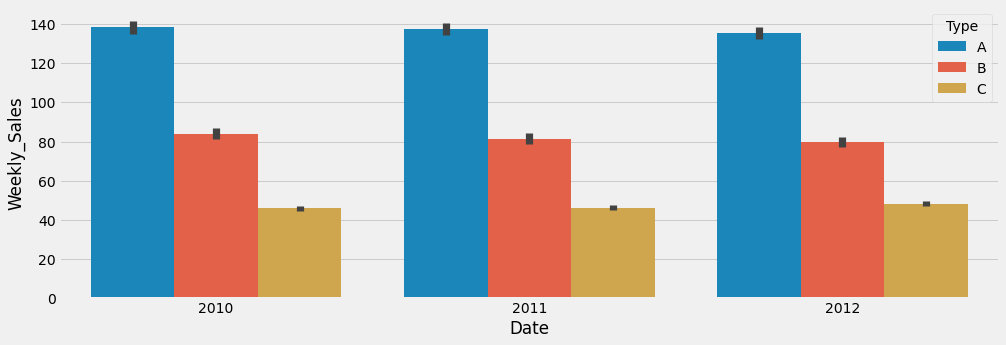

In [69]:
plt.figure(figsize=(15, 5))
sns.barplot(x=data_train.Date.dt.year, y=data_train.Weekly_Sales,hue=data_train.Type)

Doanh số của cửa hàng loại B có vẻ giảm một chút qua các năm nhưng không đáng kể.

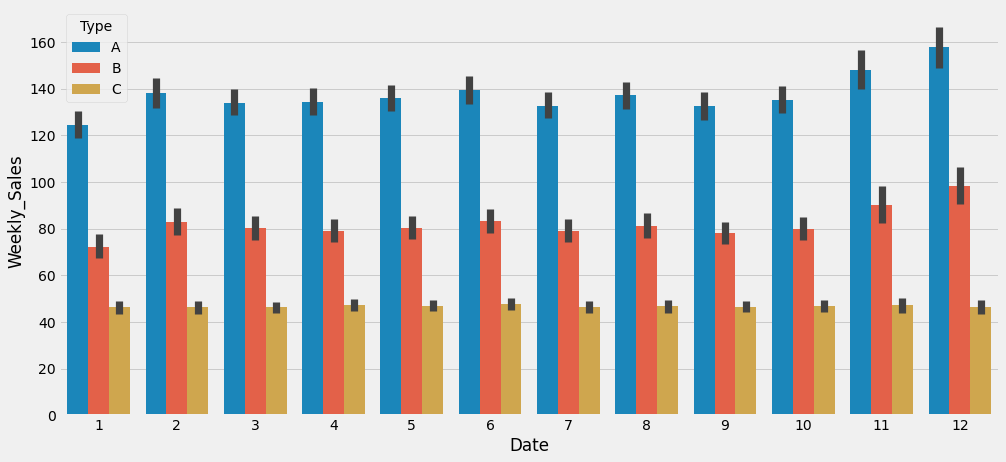

In [70]:
plt.figure(figsize=(15, 7))
sns.barplot(x=data_train.Date.dt.month, y=data_train.Weekly_Sales,hue=data_train.Type)

Cửa hàng loại A và B doanh số có sự tăng theo chu kỳ: tăng vào đầu năm và cuối năm, còn cửa hàng C doanh số gần như không đổi qua các tháng, như đã nói ở trên lý do có thể vì quy mô cửa hàng C nhỏ.

In [71]:
sales.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False
5,1,1,2010-12-03,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-02-04,57258.43,False
9,1,1,2010-09-04,42960.91,False


In [72]:
sales_by_stores= sales.groupby(['Store','IsHoliday']).agg({'Weekly_Sales':'mean'})
sales_by_stores.Weekly_Sales= sales_by_stores.Weekly_Sales.apply(int)
sales_by_stores.head()

Weekly_Sales
Store IsHoliday              
1     False             21609
      True              23039
2     False             26753
      True              28798
3     False              6332

In [73]:
index1= sales_by_stores.index.get_level_values(0)
index2= sales_by_stores.index.get_level_values(1)
temp={'Store':index1,'IsHoliday':index2,'Weekly_Sales':sales_by_stores.Weekly_Sales}
sales_by_stores= pd.DataFrame(temp, columns=['Store','IsHoliday','Weekly_Sales'])
sales_by_stores.reset_index(drop=True,inplace=True)
sales_by_stores

,Store,IsHoliday,Weekly_Sales
0,1,False,21609
1,1,True,23039
2,2,False,26753
3,2,True,28798
4,3,False,6332
...,...,...,...
85,43,True,13473
86,44,False,6046
87,44,True,5932
88,45,False,11614


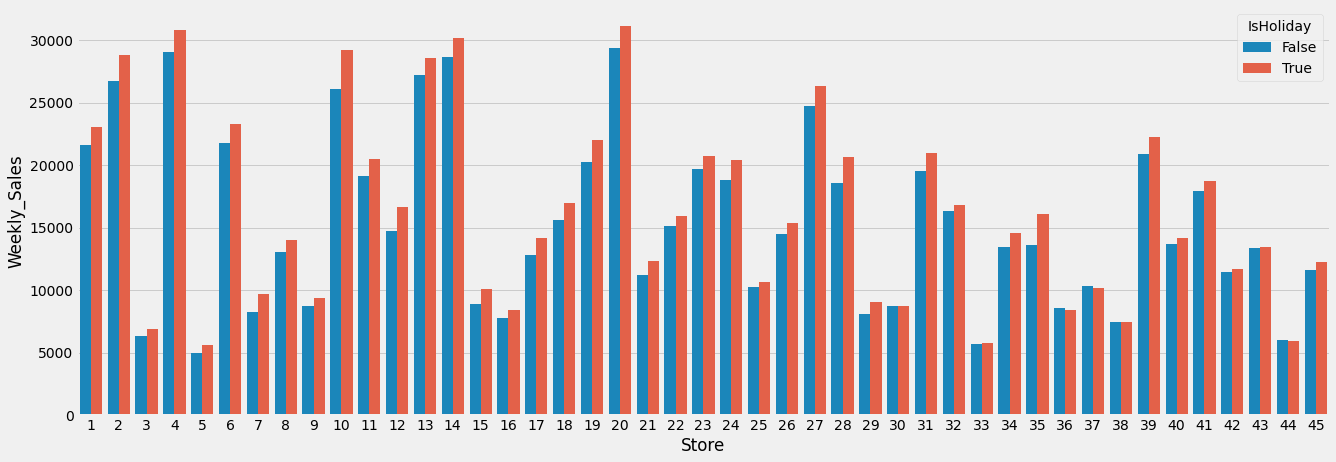

In [74]:
plt.figure(figsize=(20, 7))
sns.barplot(x=sales_by_stores.Store,y= sales_by_stores.Weekly_Sales,hue= sales_by_stores.IsHoliday)

In [75]:
temp_sales_by_stores= pd.merge(sales_by_stores,stores[['Store','Type']],on=['Store'],how='left')
temp_sales_by_stores.head()

,Store,IsHoliday,Weekly_Sales,Type
0,1,False,21609,A
1,1,True,23039,A
2,2,False,26753,A
3,2,True,28798,A
4,3,False,6332,B


[Text(0.5, 0, 'Store type C')]

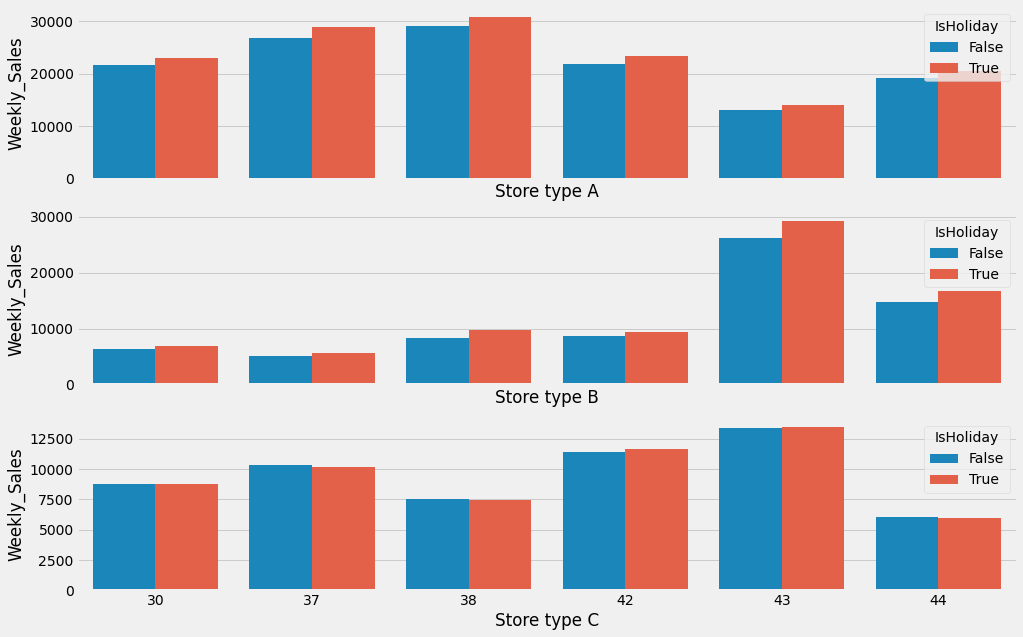

In [76]:
fig, ax = plt.subplots(3,1,figsize=(15,10),sharex=True)
type_a= temp_sales_by_stores.loc[temp_sales_by_stores.Type=='A']
type_b= temp_sales_by_stores.loc[temp_sales_by_stores.Type=='B']
type_c= temp_sales_by_stores.loc[temp_sales_by_stores.Type=='C']
sns.barplot(ax=ax[0],x=type_a.Store,y= type_a.Weekly_Sales,hue= type_a.IsHoliday).set(xlabel='Store type A')
sns.barplot(ax=ax[1],x=type_b.Store,y= type_b.Weekly_Sales,hue= type_b.IsHoliday).set(xlabel='Store type B')
sns.barplot(ax=ax[2],x=type_c.Store,y= type_c.Weekly_Sales,hue= type_c.IsHoliday).set(xlabel='Store type C')


Qua hai biểu đồ ở trên thì chúng ta có thể thấy rằng, đa số các shop thì doanh số trung bình vào các ngày lễ(holiday) lớn hơn so với ngày thường. 

In [77]:
data_table.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly_Sales,Type
0,1,2010-05-02,42.31,2.572,211.096358,8.106,False,164.0,A
1,1,2010-12-02,38.51,2.548,211.242170,8.106,True,164.0,A
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False,161.0,A
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False,140.0,A
4,1,2010-05-03,46.50,2.625,211.350143,8.106,False,155.0,A


In [78]:
original_stores.head(2)

,Store,Type,Size
0,1,A,151315
1,2,A,202307


**Linear Model** giữa biến y là sales của cửa hàng và x là size của cửa hàng

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     108.4
Date:                Wed, 09 Sep 2020   Prob (F-statistic):           2.50e-13
Time:                        15:51:59   Log-Likelihood:                -438.41
No. Observations:                  45   AIC:                             880.8
Df Residuals:                      43   BIC:                             884.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1469.4302   1440.918      1.020      0.3

Text(0.5, 1.0, 'Relative between Size of Store and Sales of Store')

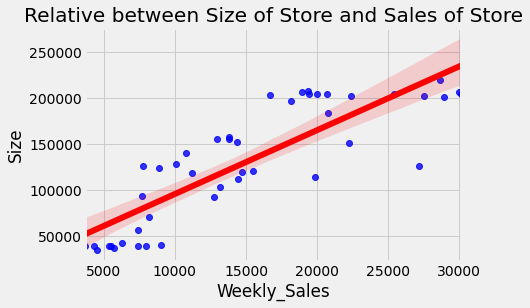

In [104]:
import statsmodels.api as sm
sales_by_store = sales.groupby(["Store"]).agg({"Weekly_Sales":"sum"})
sales_by_store.sort_index(inplace=True)
sales_by_store.Weekly_Sales = sales_by_store.Weekly_Sales/10000
sales_by_store.Weekly_Sales = sales_by_store.Weekly_Sales.apply(int)
sales_by_store_and_size = pd.merge(sales_by_store , original_stores[['Store','Size']],how='left', on=["Store"])
#sales_by_store_and_size.drop(['Type'],axis=1,inplace=True)

results = sm.OLS(sales_by_store_and_size['Weekly_Sales'],sm.add_constant(sales_by_store_and_size['Size'])).fit()
print(results.summary())
sns.regplot(x='Weekly_Sales',y='Size',data=sales_by_store_and_size,truncate=True,scatter_kws = {'color': 'blue'}, line_kws = {'color': 'red'}).set_title('Relative between Size of Store and Sales of Store')


Có thể thấy sự tương quan giữa kích thước cửa hàng và doanh thu. Cửa hàng càng lớn thì doanh thu càng lớn và ngược lại

**Hypothesis Testing**

In [81]:
sales_by_store_and_size.head()

,Store,Weekly_Sales,Size
0,1,22240,151315
1,2,27538,202307
2,3,5758,37392
3,4,29954,205863
4,5,4547,34875


Chúng ta sử dụng one sample t-test để xác định xem trung bình sales bằng 15000 hay không


In [84]:
from scipy.stats import ttest_1samp
sales_mean = np.mean(sales_by_store_and_size['Weekly_Sales'])
print(sales_mean)
tset, pval = ttest_1samp(sales_by_store_and_size['Weekly_Sales'], 15000)
#null hypothesis is avg sales is 15000 or not
print('p-values',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

14971.111111111111
p-values 0.9803329077229772
we are accepting null hypothesis


Qua test, chúng ta có thể thấy rằng trung bình 1 cửa hàng sẽ có doanh thu là 15000 từ đó, khi mở một cửa hàng mới, chúng ta có thể dự đoán doanh thu, chi phí, khả năng thu hồi vốn thông qua con số 15000 này

In [86]:
print(data.shape)
data.head()

(143, 6)


,Weekly_Sales,Temperature,Fuel_Price,IsHoliday,CPI,Unemployment
Date,,,,,,
2010-01-10,42,69.868000,2.734333,False,168.354706,8.475289
2010-02-04,50,53.120889,2.827333,False,167.789036,8.497711
2010-02-07,48,77.133333,2.793511,False,167.982101,8.428578
2010-02-19,48,37.719778,2.672067,False,167.871686,8.619311
2010-02-26,43,39.243556,2.683933,False,167.909657,8.619311


Test xem mean của 2 population có khác nhau hay không. Ở đây chúng ta kiểm tra xem lượng sales của các cửa hàng trong các năm có khác nhau hay không. Mục đích có thể khi có thêm cửa hàng mới, chúng ta có thể dự tính được việc đó có ảnh hưởng đến doanh thu của các cửa hàng khác trong năm không.
Null hypothesis ở đây là mean của các năm giống nhau

In [100]:
temp = sales.groupby("Date").agg({"Weekly_Sales":"sum"}).Weekly_Sales.apply(int).sort_index()
print(temp.index.year.unique())
sales_in2010= temp.loc[temp.index.year==2010,]
sales_in2011= temp.loc[temp.index.year==2011,]
sales_in2012= temp.loc[temp.index.year==2012,]
from scipy.stats import ttest_ind

print('Compare 2010 and 2011')
mean_2010 = np.mean(sales_in2010)
mean_2011 = np.mean(sales_in2011)
print("sales mean 2010:", mean_2010)
print("sales mean 2011:", mean_2011)
sales2010_std = np.std(sales_in2010)
sales2011_std = np.std(sales_in2011)
print("sales std value in 2010:",sales2010_std)
print("sales std value in 2011:",sales2011_std)
ttest,pval = ttest_ind(sales_in2010,sales_in2011)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")
print('------------------------------------------------------------------------')

print('Compare 2011 and 2012')
mean_2012 = np.mean(sales_in2012)
print("sales mean 2012:", mean_2012)
sales2012_std = np.std(sales_in2012)
print("sales std value in 2012:",sales2012_std)
ttest,pval = ttest_ind(sales_in2011,sales_in2012)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")
print('------------------------------------------------------------------------')

print('Compare 2010 and 2012')
ttest,pval = ttest_ind(sales_in2010,sales_in2012)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")
print('------------------------------------------------------------------------')


Int64Index([2010, 2011, 2012], dtype='int64', name='Date')
Compare 2010 and 2011
sales mean 2010: 47685127.041666664
sales mean 2011: 47080768.90384615
sales std value in 2010: 6544249.907186995
sales std value in 2011: 5991720.328323947
p-value 0.6342468027968597
we accept null hypothesis
------------------------------------------------------------------------
Compare 2011 and 2012
sales mean 2012: 46514717.11627907
sales std value in 2012: 2435645.1615755875
p-value 0.5667346396060543
we accept null hypothesis
------------------------------------------------------------------------
Compare 2010 and 2012
p-value 0.2769412727310672
we accept null hypothesis
------------------------------------------------------------------------


Thông qua ba hypothesis testing, chúng ta có thể thấy rằng sales của ba năm hầu như không khác nhau.

In [101]:
features.shape

(8190, 12)